# Pandas IV: Analizando la base de datos MNIST

![](https://drive.google.com/uc?export=view&id=1ZUrKsowpvZ2_5CZObZKq_U4xjYm-eR3K)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!ls sample_data

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
df = pd.read_csv("sample_data/mnist_train_small.csv", header=None)

In [ ]:
print(28 * 28)

784


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB


# MNIST: Imágenes
Cada imagen tiene una resolución 28x28

In [ ]:
import numpy as np

In [ ]:
df.iloc[:, 1:]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = np.array(df.iloc[:, 0])  # Etiquetas
x_train = np.array(df.iloc[:, 1:]) # Imagen (28x28)

In [ ]:
y_train.shape

(20000,)

In [ ]:
x_train.shape

(20000, 784)

In [ ]:
x_train_img = x_train.reshape((-1,28,28))
x_train_img.shape

(20000, 28, 28)

<ipython-input-21-fac6d9ad69db>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i+1)


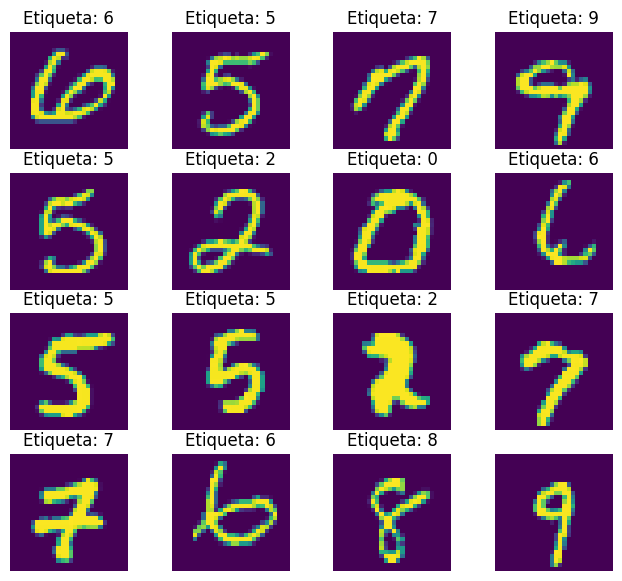

In [ ]:
plt.figure(figsize=(8,7))

for i in range(16): # i = 0,1,2,3,...,15
  plt.title(f"Etiqueta: {y_train[i-1]}")
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train_img[i])
  plt.axis("off")
plt.show()

In [ ]:
x_train_img.shape

(20000, 28, 28)

In [ ]:
x_train_img.shape[0]

20000

In [ ]:
N = np.arange(x_train_img.shape[0])
print(N)

[    0     1     2 ... 19997 19998 19999]


In [ ]:
print(np.random.choice(N))

19041


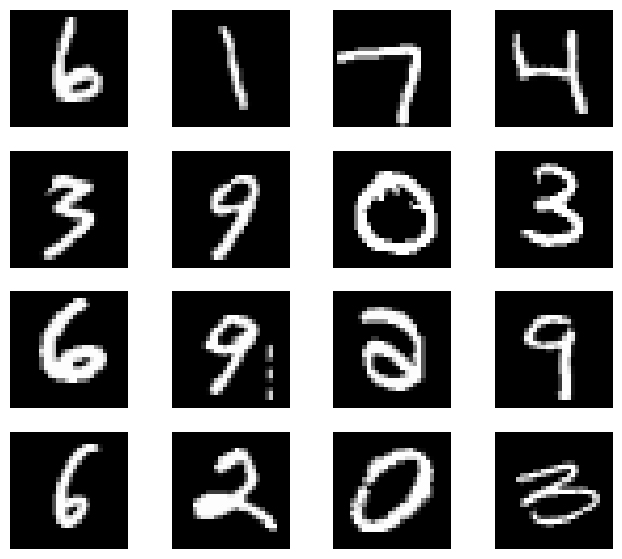

In [ ]:
plt.figure(figsize=(8,7))

N = np.arange(x_train_img.shape[0])

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train_img[np.random.choice(N)], cmap="gray")
  plt.axis("off")
plt.show()

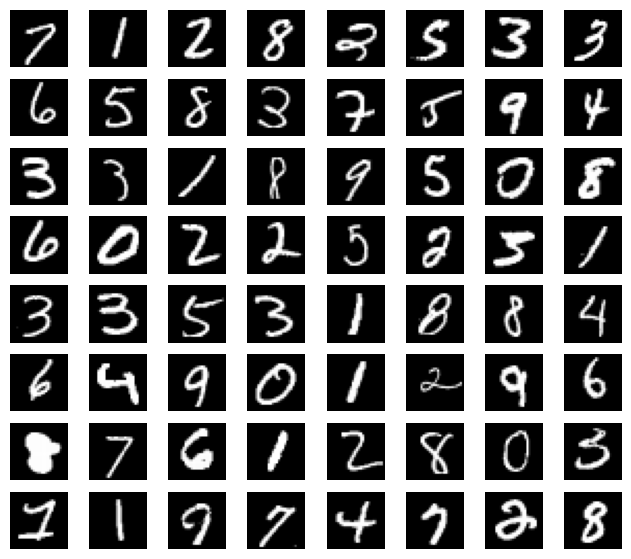

In [ ]:
plt.figure(figsize=(8,7))

N = np.arange(x_train_img.shape[0])

for i in range(64):
  plt.subplot(8, 8, i+1)
  plt.imshow(x_train_img[np.random.choice(N)], cmap="gray")
  plt.axis("off")
plt.show()

In [ ]:
x_train_img.shape

(20000, 28, 28)

In [ ]:
x_tensor = x_train_img[:,:,:,np.newaxis]

In [ ]:
x_tensor.shape

(20000, 28, 28, 1)

In [ ]:
# (N,C,H,W)

In [ ]:
def ToTensor(x):
  x_t = x[:,:,:,np.newaxis]  # (20000,28,28,1)
  x_t = np.transpose(x_t, (0,3,1,2))   # (20000,1,28,28)
  return x_t

In [ ]:
x_train_img.shape

(20000, 28, 28)

In [ ]:
x_t = ToTensor(x_train_img)
x_t.shape

(20000, 1, 28, 28)

# MNIST: Etiquetas

In [ ]:
df.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
      dtype='int64', length=785)

In [ ]:
df = df.rename(columns={0:"Etiqueta"})

In [ ]:
df.head()

,Etiqueta,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

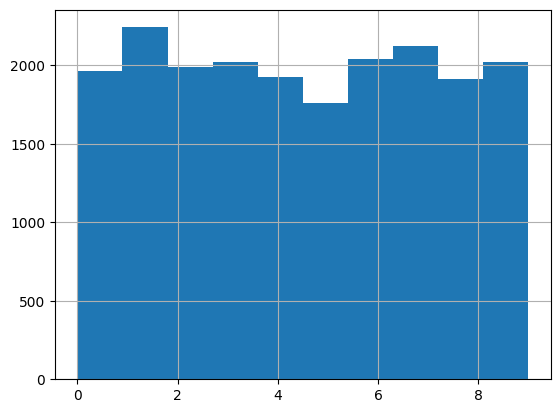

In [ ]:
df["Etiqueta"].hist()